# Stock prices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import requests
from datetime import datetime, timedelta

In [ ]:
API_KEY = "YOUR_API_KEY"

In [ ]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['t'], origin='unix', unit='ms')
    return df.set_index(keys='date').drop(columns='t')

In [ ]:
def fix_column_names_on_dataframe(df):
    mapping = {
        'o': 'open',
        'c': 'close',
        'h': 'high',
        'l': 'low',
        'n': 'number',
        'v': 'volume',
        'vw': 'avg_price'
    }
    return df.rename(columns=mapping)

In [ ]:
def create_stock_df_of_company(company_code):
    company_code = company_code.upper()

    start_date = datetime.today() - timedelta(days=91)
    end_date = datetime.today() - timedelta(days=1)
    start = datetime.strftime(start_date, "%Y-%m-%d")
    end = datetime.strftime(end_date, "%Y-%m-%d")

    url = f"https://api.polygon.io/v2/aggs/ticker/{company_code}/range/1/day/{start}/{end}?apiKey={API_KEY}"

    api_data = requests.get(url).json()

    df = pd.DataFrame(api_data['results'])

    df = fix_datetime_on_dataframe(df)
    df = fix_column_names_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [ ]:
apple_df = create_stock_df_of_company('AAPL')
apple_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2024-03-25 04:00:00,54288328.0,170.7132,170.565,170.85,171.94,169.450,727686,AAPL
2024-03-26 04:00:00,57388449.0,170.3230,170.000,169.71,171.42,169.580,684303,AAPL
2024-03-27 04:00:00,60263665.0,172.5879,170.410,173.31,173.60,170.110,670629,AAPL
2024-03-28 04:00:00,65671690.0,171.3942,171.750,171.48,172.23,170.510,648026,AAPL
2024-04-01 04:00:00,46240500.0,170.0696,171.190,170.03,171.25,169.475,676830,AAPL


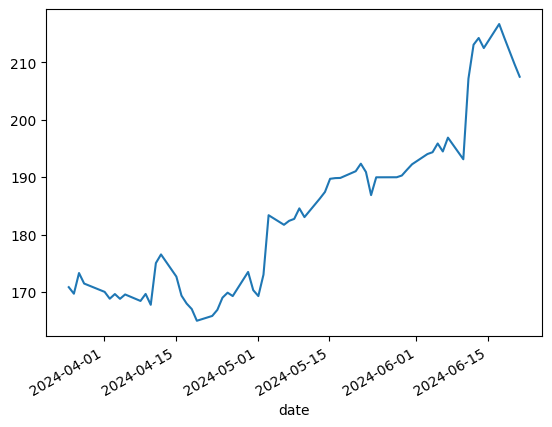

In [ ]:
apple_df['close'].plot(kind='line');

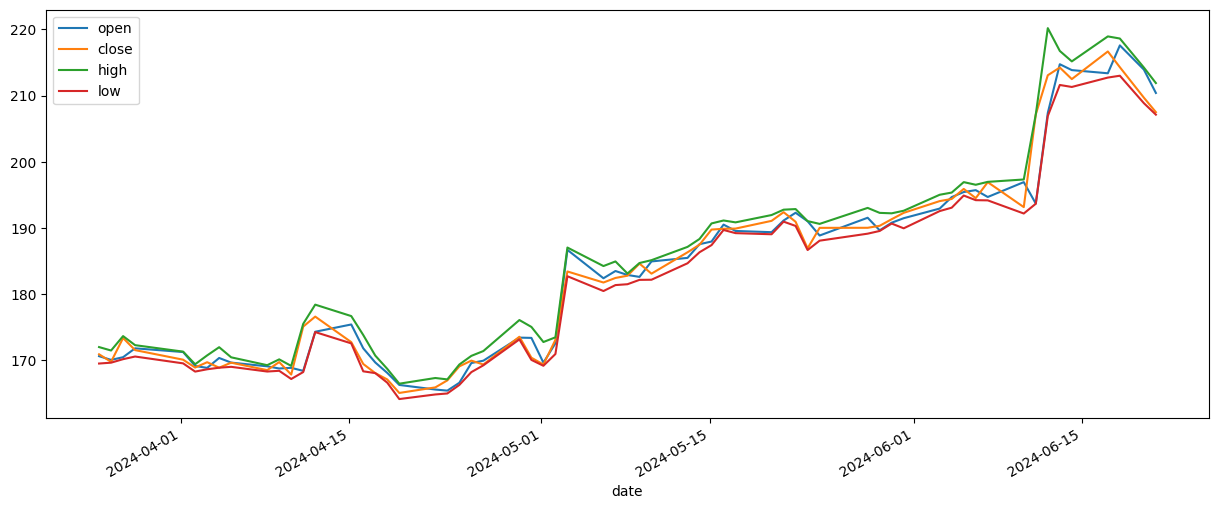

In [ ]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6));

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/jules/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/jules/code/lewagon/data-solutions/02-Data-Toolkit/02-Data-Sourcing/01-Stock-Market-API/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.34s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [ ]:
# Set default figsize for all notebook (usefull in TS analysis)
matplotlib.rcParams['figure.figsize'] = (15, 6)

In [ ]:
codes = ['AMZN', 'GOOGL', 'META']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [ ]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()

,volume,avg_price,open,close,high,low,number,company_code
date,,,,,,,,
2024-03-25 04:00:00,54288328.0,170.7132,170.565,170.85,171.94,169.450,727686,AAPL
2024-03-26 04:00:00,57388449.0,170.3230,170.000,169.71,171.42,169.580,684303,AAPL
2024-03-27 04:00:00,60263665.0,172.5879,170.410,173.31,173.60,170.110,670629,AAPL
2024-03-28 04:00:00,65671690.0,171.3942,171.750,171.48,172.23,170.510,648026,AAPL
2024-04-01 04:00:00,46240500.0,170.0696,171.190,170.03,171.25,169.475,676830,AAPL


<AxesSubplot:xlabel='date'>

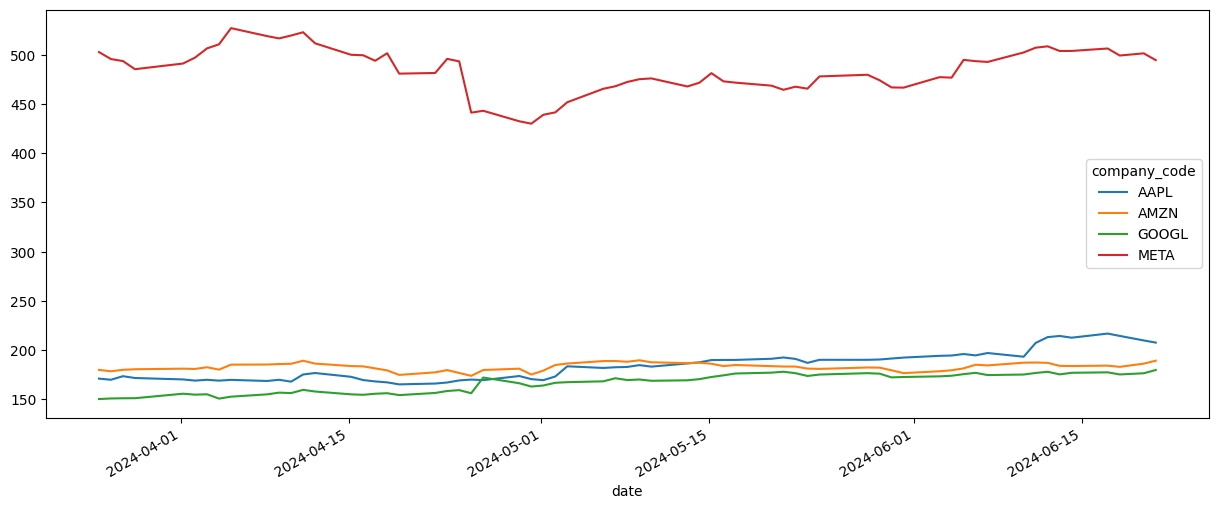

In [ ]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line')

In [ ]:
def normalize(series):
    return series / series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

<AxesSubplot:xlabel='date'>

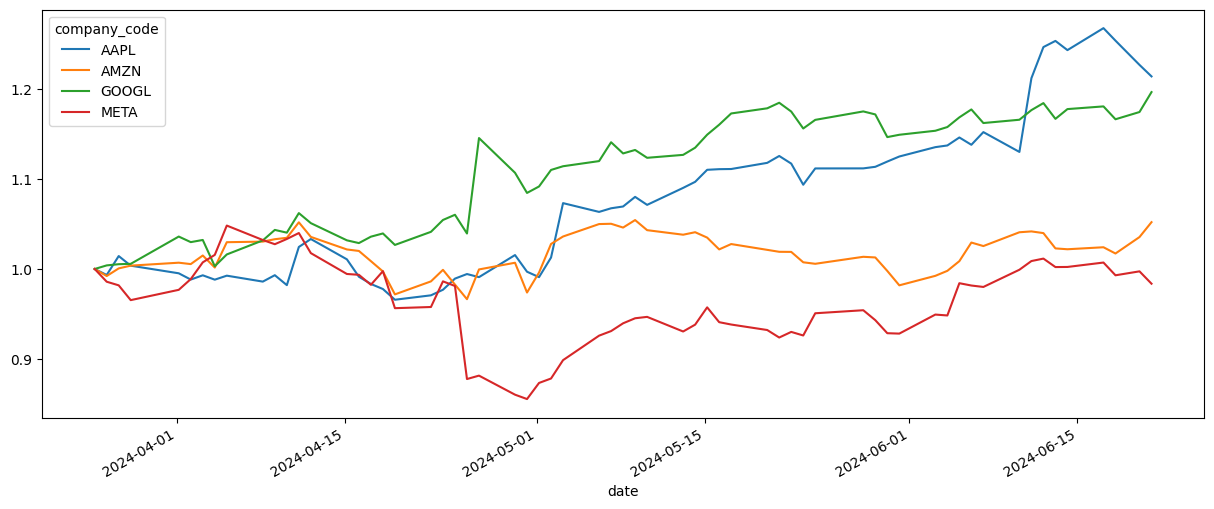

In [ ]:
normalized_pivot.plot(kind='line')